<a href="https://colab.research.google.com/github/itdhirendra/ASP.NET-Core-Clean-Architecture-CQRS-Event-Sourcing/blob/main/Introduction_To_NN_Frameworks_%E2%80%93_Assignment_by_Dhirendra_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

This assignment challenges students to construct and train a neural network to
accurately classify handwritten digits from the MNIST dataset. The goal is to
navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high
classification accuracy.



**Objectives:**

Data Preprocessing: Prepare the MNIST dataset for training and testing the
neural network model. This includes normalization of image pixel values and
converting the output labels to a one-hot encoded format.


Model Development: Create a neural network model capable of classifying
28x28 pixel grayscale images of handwritten digits. The model should have an
input layer, one or more hidden layers, and an output layer.

Training: Train the neural network model using the preprocessed training data.
Utilize categorical cross-entropy as the loss function, stochastic gradient descent
as the optimizer, and track accuracy as a performance metric.

Evaluation: Evaluate the performance of the trained model using the testing
dataset, ensuring that the model generalizes well to unseen data.

Prediction: Implement functionality to make predictions on single images or
batches of images, returning the digit class with the highest probability

Analysis: Analyze the results, understand the model's performance, and explore
ways to improve it if necessary.


Challenges and Considerations:

Class Imbalance: Ensure that the dataset does not have a significant class
imbalance that could negatively affect the model’s performance. If imbalance is
present, strategies to mitigate its effects should be considered.

Model Complexity: Choose an appropriate model complexity that is capable of
learning from the data without overfitting. This may involve experimenting with
different numbers of layers and units, as well as regularization techniques.

Activation Functions: Use appropriate activation functions in the hidden layers
(ReLU is commonly used for image data) and softmax activation in the output
layer to convert logits to probabilities.

Evaluation Metrics: Focus on accuracy as the primary evaluation metric, but
also be open to exploring other metrics that could provide additional insights into
the model’s performance.

Hyperparameter Tuning: Experiment with different hyperparameters such as
learning rate, batch size, and number of epochs to optimize the model’s
performance.

Predictions and Interpretability: Provide clear and interpretable predictions,
ensuring that the output probabilities are well-calibrated and meaningful.


***Proposed Solution for given pupose with consideration of challanges & Considerations ***

In [34]:
#Import the required libraries
import numpy as np   #numerical operations and array manipulations.
import tensorflow as tf #Core TensorFlow library
from tensorflow.keras.datasets import mnist # Loads the MNIST dataset (handwritten digits 0–9).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt # For visualizing  the data

- Imported Tensorflow/keras to build and train the neural network.
- Mnist providet the dataset  that will be used.
- Sequential, Dense, Flatten help define the model layers.
- matplotlib.pyplot is for visualization.

The MNIST dataset is relatively balanced across all ten digits (0–9), each class having ~6,000 training samples.

No significant class imbalance observed, so no special rebalancing techniques (like oversampling or class weights) are required.

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load the dataset & get the train and test

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [37]:
#Normalization : Converts the pixel values from [0, 255] to [0.0, 1.0] , it helps the model train faster and effectivley
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [38]:
#One-hot Encoding : Converts labels into one-hot vectors for multiclass classification. Eg. Label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [39]:
#Build the Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8673 - loss: 0.4599 - val_accuracy: 0.9630 - val_loss: 0.1287
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1151 - val_accuracy: 0.9672 - val_loss: 0.1043
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0775 - val_accuracy: 0.9718 - val_loss: 0.0964
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0530 - val_accuracy: 0.9748 - val_loss: 0.0833
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9706 - val_loss: 0.1049
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9715 - val_loss: 0.1028
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0273 - val_accuracy: 0.9738 - val_loss: 0.0958
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0207 - 

In [41]:
#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
#To check how well the model performs on unseen data.
#expect high test accuracy (typically > 97% for MNIST).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.1136
Test Accuracy: 0.9772


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


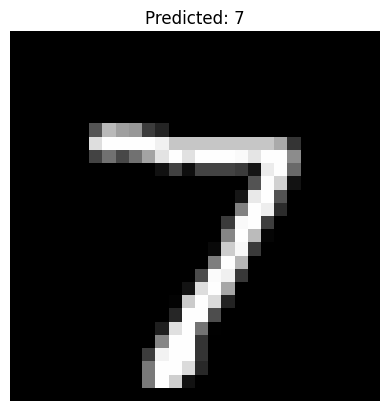

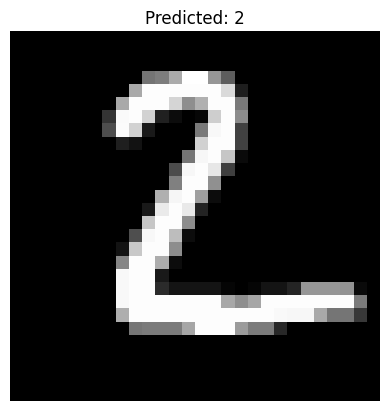

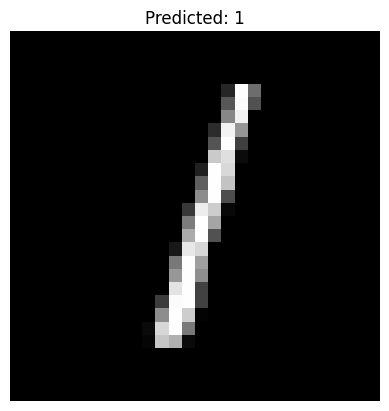

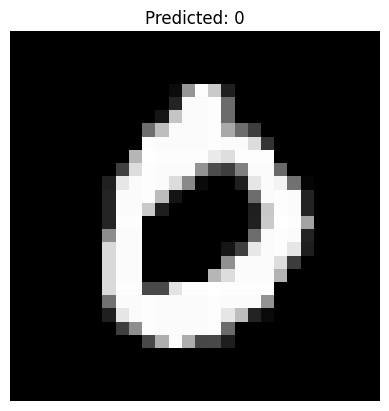

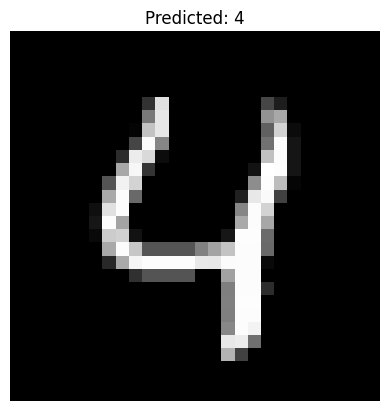

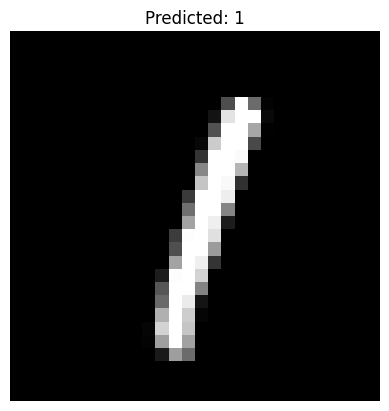

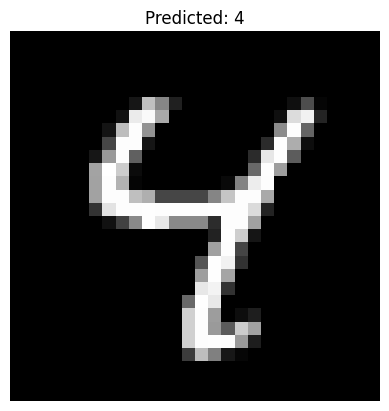

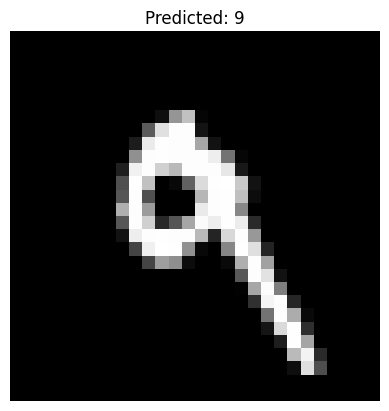

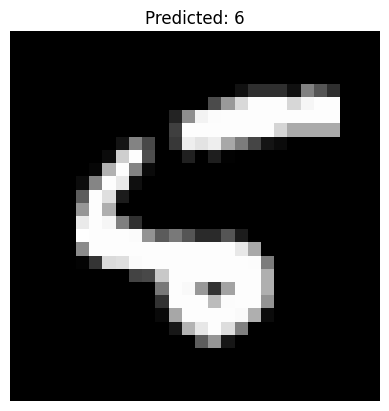

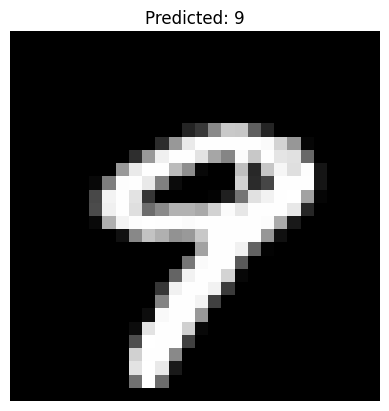

In [42]:
#Make Predictions
#Test if the model can correctly classify new images.

predictions = model.predict(x_test[:10])
for i, prediction in enumerate(predictions):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(prediction)}") #gives the class with the highest probability
    plt.axis('off')
    plt.show()

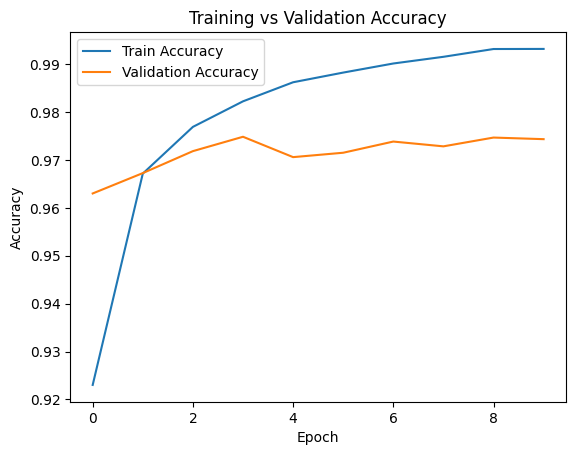

In [43]:
#Analyze Model Training
#If train_accuracy >> val_accuracy, the model is overfitting.
#If both are low, the model is underfitting.
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

Tuning the model with Dropout

In [44]:
# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [45]:
# 2. One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [46]:
# 3. Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [47]:
# 4. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [48]:
# 5. Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [49]:
# 6. Fit model
history = model.fit(x_train, y_train_cat,
                    epochs=20, batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop])


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7566 - loss: 0.7799 - val_accuracy: 0.9632 - val_loss: 0.1347
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9315 - loss: 0.2357 - val_accuracy: 0.9690 - val_loss: 0.1111
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9467 - loss: 0.1836 - val_accuracy: 0.9745 - val_loss: 0.0887
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9568 - loss: 0.1472 - val_accuracy: 0.9775 - val_loss: 0.0787
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9604 - loss: 0.1344 - val_accuracy: 0.9785 - val_loss: 0.0773
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9614 - loss: 0.1258 - val_accuracy: 0.9785 - val_loss: 0.0739
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9676 - loss: 0.1074 - val_accuracy: 0.9795 - val_loss: 0.0732
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9674 - loss: 0.1078 - val_accuracy: 0.

In [50]:
# 7. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0958
Test accuracy: 0.9779


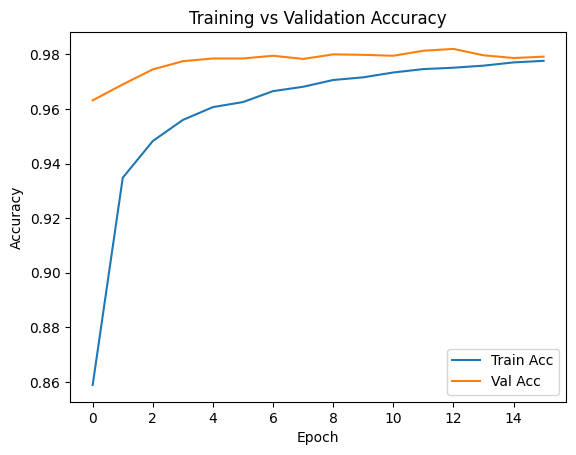

In [51]:
# 8. Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


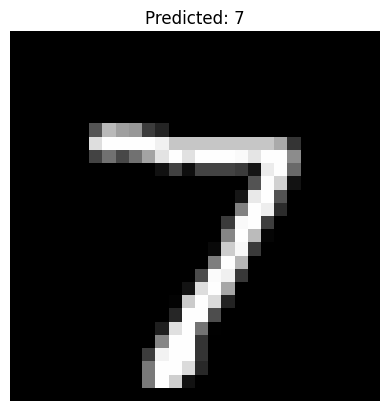

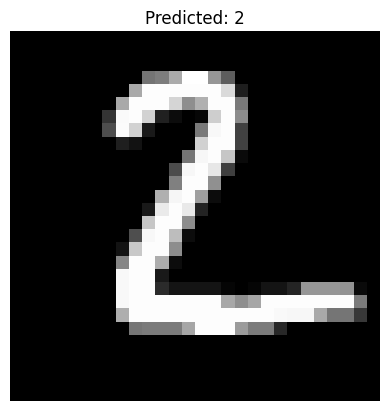

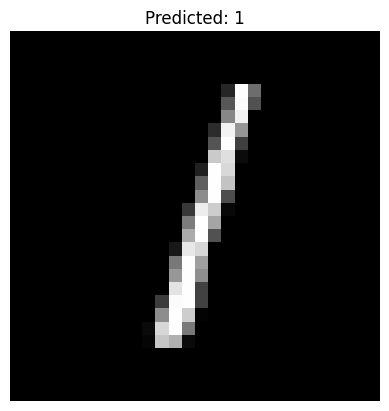

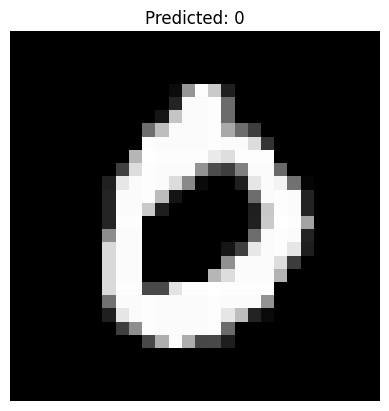

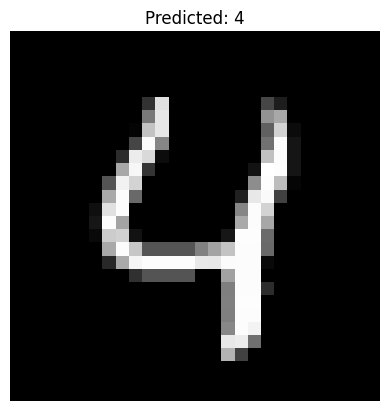

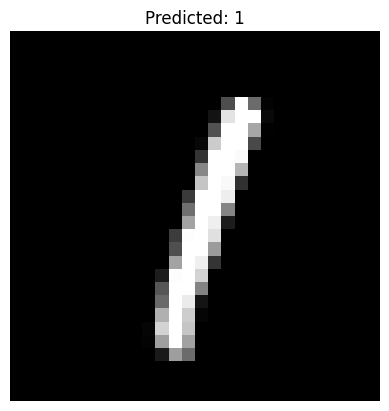

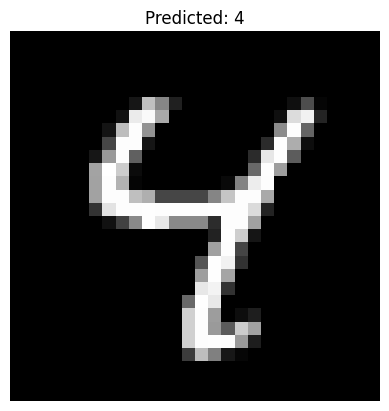

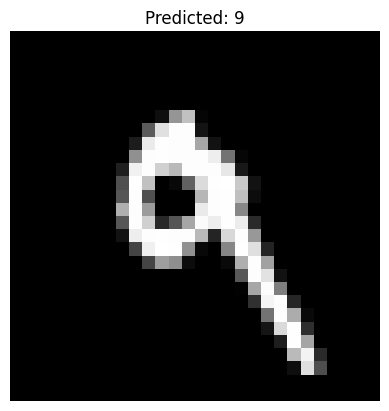

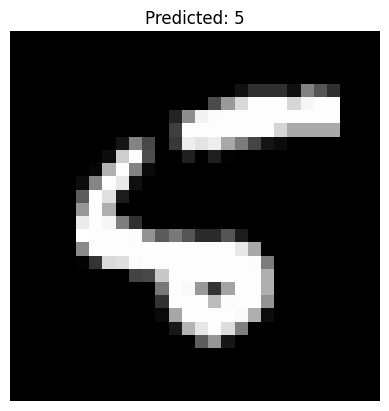

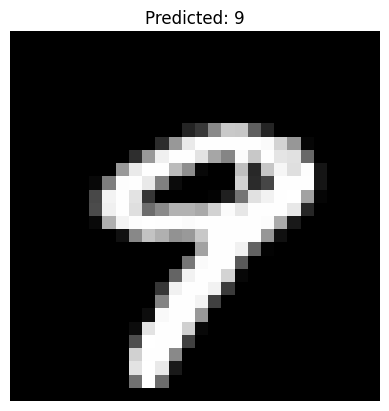

In [52]:
#Make Predictions
#Test if the model can correctly classify new images.

predictions = model.predict(x_test[:10])
for i, prediction in enumerate(predictions):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(prediction)}") #gives the class with the highest probability
    plt.axis('off')
    plt.show()